In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import time
import matplotlib.ticker as ticker
from sklearn import preprocessing

In [2]:
df = pd.read_csv('loan.csv')

In [3]:
df.head()

,Income,Loan Amount,Default
0,15,8,No
1,30,8,No
2,5,9,Yes
3,22,10,No
4,33,12,No


In [4]:
df['Default'].value_counts()

No     17
Yes    13
Name: Default, dtype: int64

array([[<Axes: title={'center': 'Income'}>]], dtype=object)

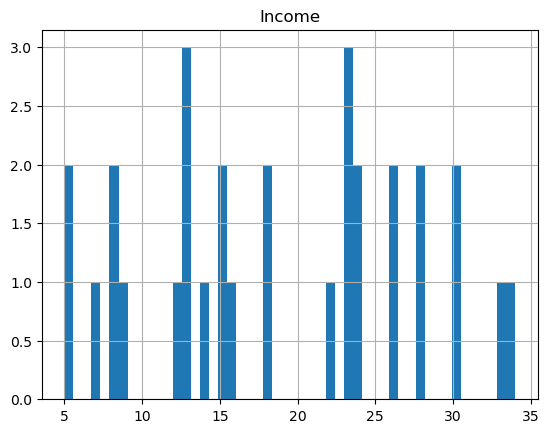

In [5]:
df.hist(column = 'Income', bins = 50)

In [6]:
df.columns

Index(['Income', 'Loan Amount', 'Default'], dtype='object')

In [7]:
x = df[['Income', 'Loan Amount']].values

In [8]:
x[0:5]

array([[15,  8],
       [30,  8],
       [ 5,  9],
       [22, 10],
       [33, 12]], dtype=int64)

In [9]:
y = df['Default'].values
y[0:5]

array(['No', 'No', 'Yes', 'No', 'No'], dtype=object)

In [10]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]


array([[-0.44687775, -1.31311142],
       [ 1.33272391, -1.31311142],
       [-1.63327886, -1.28324536],
       [ 0.38360302, -1.25337929],
       [ 1.68864424, -1.19364716]])

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [12]:
print('Train set:', x_train.shape, y_train.shape)

Train set: (24, 2) (24,)


In [13]:
print('Test set', x_test.shape, y_test.shape)

Test set (6, 2) (6,)


In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
model = KNeighborsClassifier()
t0 = time.time()
model.fit(x_train, y_train)
dtDia_time = time.time() - t0
print("KNN model fitted in %.3f s" % dtDia_time)

KNN model fitted in 0.001 s


In [29]:
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [17]:
yhat = neigh.predict(x_test)
y[0:5]

array(['No', 'No', 'Yes', 'No', 'No'], dtype=object)

In [18]:
from sklearn import metrics
print("Train set Accuracy:", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print('Test set Accuracy:', metrics.accuracy_score(y_test, yhat))

Train set Accuracy: 0.7916666666666666
Test set Accuracy: 0.3333333333333333


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
     

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 249, in predict
    probabilities = self.predict_proba(X)
  

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 249, in predict
    probabilities = self.predict_proba(X)
  

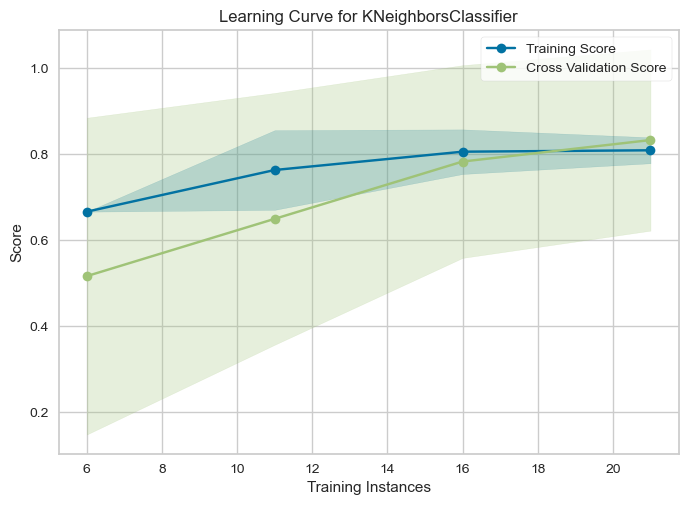

<Axes: title={'center': 'Learning Curve for KNeighborsClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [19]:
from yellowbrick.model_selection import ValidationCurve, LearningCurve
learning_curve = LearningCurve(neigh, cv=10)


# Fit the model on the training data
learning_curve.fit(x_train, y_train)

# Plot the learning curve
learning_curve.show()

In [20]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros(Ks-1)
confusionMx = [];
for n in range(1, Ks):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train, y_train)
    yhat = neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat == y_test)/np.sqrt(yhat.shape[0])

    
mean_acc

array([0.5       , 0.5       , 0.5       , 0.33333333, 0.66666667,
       0.66666667, 0.66666667, 0.5       , 0.5       ])

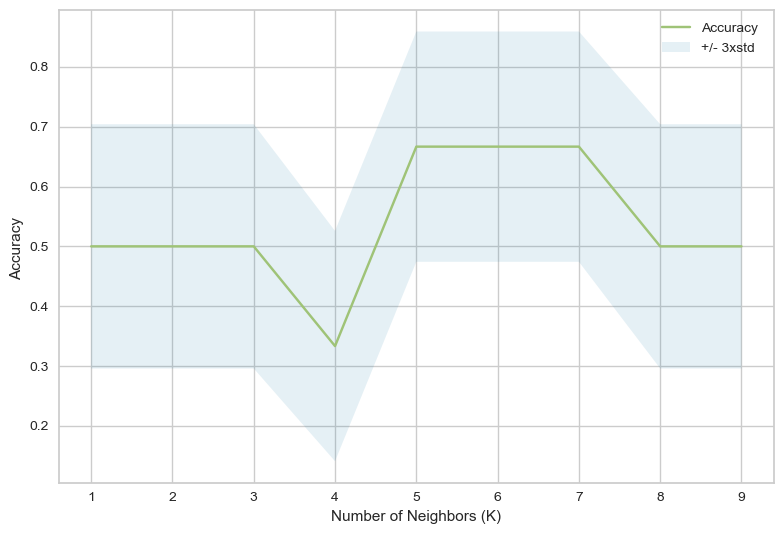

In [21]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [31]:
model = KNeighborsClassifier()
t0 = time.time()
model.fit(x_train, y_train)
dtDia_time = time.time() - t0
print("KNN model fitted in %.3f s" % dtDia_time)

KNN model fitted in 0.004 s
